In [49]:
# import packages
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [50]:
datadir = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/means/'
datadir_bgc = '/data/oceanparcels/input_data/NEMO-MEDUSA_BGC/ORCA0083-N006/means/' 
dirread_mesh = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/domain/' 

xslice = slice(2000, 4000)
yslice = slice(1000, 3000)
nav_lon = xr.open_dataset(dirread_mesh+'coordinates.nc',decode_times=False).nav_lon.sel(x=xslice, y = yslice) 
nav_lat = xr.open_dataset(dirread_mesh+'coordinates.nc',decode_times=False).nav_lat.sel(x=xslice, y = yslice) 

In [51]:
yr0 = '2004'

In [52]:
mons = ['01','02','03','04','05','06']

# <font color = steelblue> Sea surface temperature

In [6]:
SST = xr.open_mfdataset((glob(datadir+'ORCA0083-N06_%s%s*d05T.nc'% (yr0,mons[0])) + 
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[1])) + 
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[2])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[3])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[4])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[5]))),
                       combine='by_coords').sst.sel(x=xslice).mean(dim = 'time_counter')  

SST = SST.assign_coords(nav_lat=SST.nav_lat.fillna(0.))
SST = SST.assign_coords(nav_lon=SST.nav_lon.where(SST.nav_lon<72, SST.nav_lon-360))

([], <a list of 0 Text xticklabel objects>)

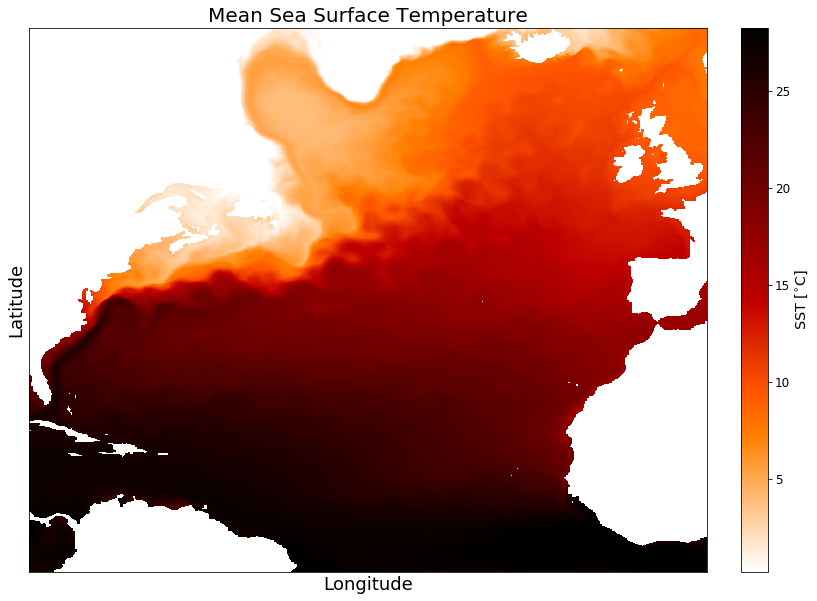

In [15]:
plt.figure(figsize = (15,10))
im = SST.where(SST.values > 0).plot(robust = True, cmap = 'gist_heat_r', add_colorbar = False) 
plt.xlim(450, 1450)
plt.ylim(1500, 2500)
plt.title('Mean Sea Surface Temperature', size = 20)

plt.ylabel('Latitude', fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)

cb = plt.colorbar(im, orientation="vertical", pad=0.04)
cb.set_label(label='SST [$^{\circ}$C]', size='x-large')
cb.ax.tick_params(labelsize='large')

plt.yticks([])
plt.xticks([])

# <font color = steelblue> Sea surface salinity

In [17]:
SSS = xr.open_mfdataset((glob(datadir+'ORCA0083-N06_%s%s*d05T.nc'% (yr0,mons[0])) + 
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[1])) + 
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[2])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[3])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[4])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[5]))),
                       combine='by_coords').sss.sel(x=xslice).mean(dim = 'time_counter')  

SSS = SSS.assign_coords(nav_lat=SSS.nav_lat.fillna(0.))
SSS = SSS.assign_coords(nav_lon=SSS.nav_lon.where(SSS.nav_lon<72, SSS.nav_lon-360))

([], <a list of 0 Text xticklabel objects>)

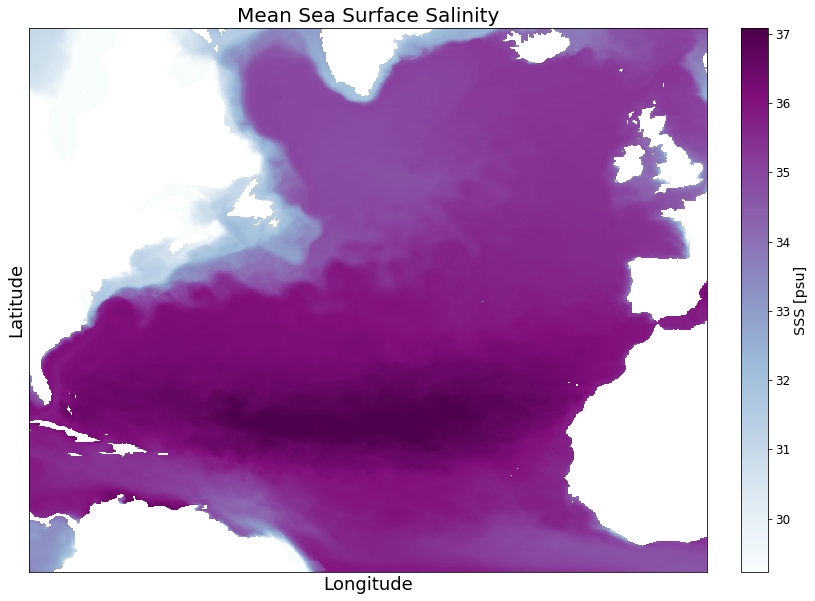

In [20]:
plt.figure(figsize = (15,10))

im = SSS.plot(robust = True, cmap = 'BuPu', add_colorbar = False) 

plt.xlim(450, 1450)
plt.ylim(1500, 2500)
plt.title('Mean Sea Surface Salinity', fontsize = 20)

plt.ylabel('Latitude', fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)

cb = plt.colorbar(im, orientation="vertical", pad=0.04)
cb.set_label(label='SSS [psu]', size='x-large')
cb.ax.tick_params(labelsize='large')

plt.yticks([])
plt.xticks([])

#  <font color = steelblue>mixed layer depth

In [31]:
MLD = xr.open_mfdataset((glob(datadir+'ORCA0083-N06_%s%s*d05T.nc'% (yr0,mons[0])) + 
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[1])) + 
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[2])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[3])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[4])) +
                        glob(datadir+'ORCA0083-N06_%s%s*d05T.nc' % (yr0,mons[5]))),
                       combine='by_coords').mldr10_1.sel(x=xslice).mean(dim = 'time_counter')  

MLD = MLD.assign_coords(nav_lat=MLD.nav_lat.fillna(0.))
MLD = MLD.assign_coords(nav_lon=MLD.nav_lon.where(MLD.nav_lon<72, MLD.nav_lon-360))

([], <a list of 0 Text xticklabel objects>)

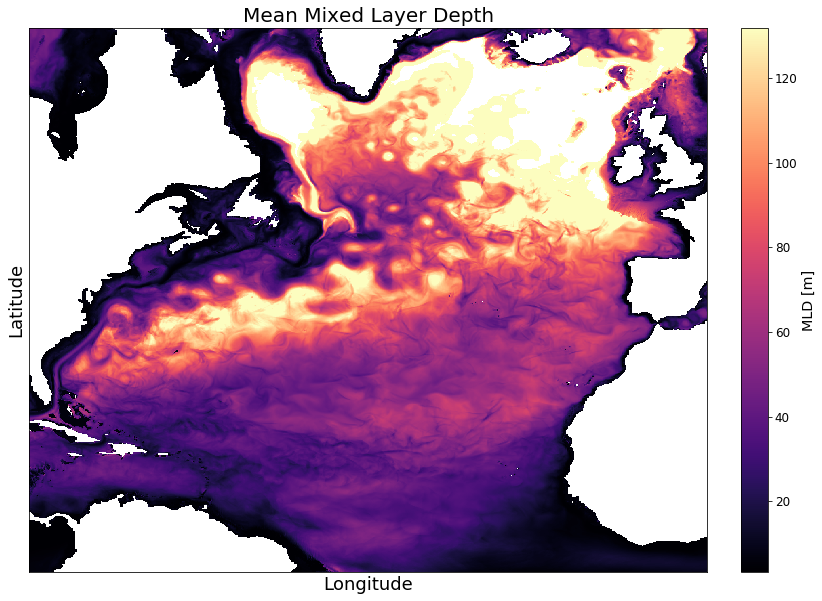

In [63]:
plt.figure(figsize = (15,10))

im = MLD.where((MLD.values < 200) & (MLD.values > 0)).plot(robust = True, cmap = 'magma', add_colorbar = False) 

plt.xlim(450, 1450)
plt.ylim(1500, 2500)
plt.title('Mean Mixed Layer Depth', fontsize = 20)

plt.ylabel('Latitude', fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)

cb = plt.colorbar(im, orientation="vertical", pad=0.04)
cb.set_label(label='MLD [m]', size='x-large')
cb.ax.tick_params(labelsize='large')

plt.yticks([])
plt.xticks([])

# phytoplankton concentration

In [53]:
nonD = xr.open_mfdataset((glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[0])) +
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[1])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[2])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[3])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[4])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[5]))),
                       combine='by_coords').PHD.sel(x=xslice,deptht = slice(0,1)).mean('time_counter')

D = xr.open_mfdataset((glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[0])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[1])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[2])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[3])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[4])) + 
                        glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[5]))),
                       combine='by_coords').PHN.sel(x=xslice,deptht = slice(0,1)).mean('time_counter') 

phyto = nonD[0]+D[0]
phyto = phyto.assign_coords(nav_lat=nonD.nav_lat.fillna(0.))
phyto = phyto.assign_coords(nav_lon=nonD.nav_lon.where(nonD.nav_lon<72, nonD.nav_lon-360)) 

([], <a list of 0 Text xticklabel objects>)

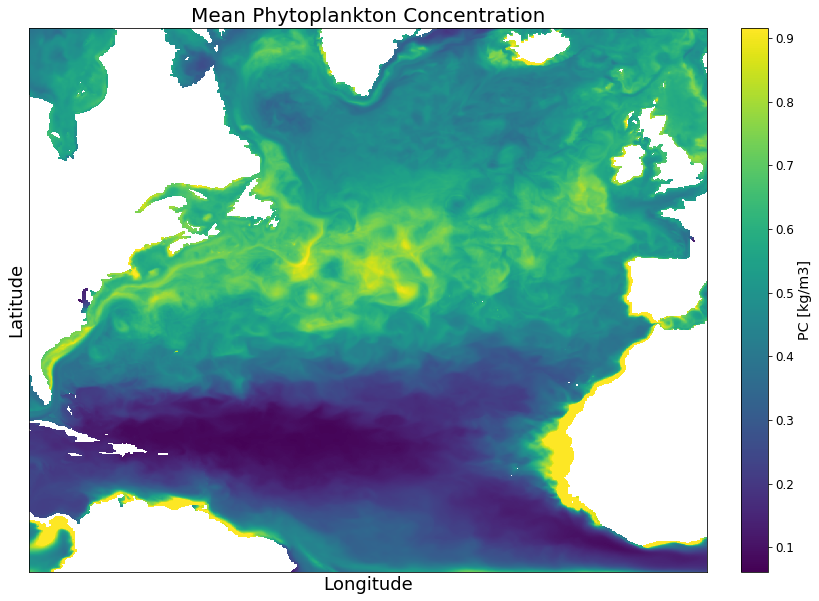

In [54]:
plt.figure(figsize = (15,10))

im = phyto.plot(robust = True, cmap = 'viridis', add_colorbar = False) 

plt.xlim(450, 1450)
plt.ylim(1500, 2500)
plt.title('Mean Phytoplankton Concentration', fontsize = 20)

plt.ylabel('Latitude', fontsize = 18)
plt.xlabel('Longitude', fontsize = 18)

cb = plt.colorbar(im, orientation="vertical", pad=0.04)
cb.set_label(label='PC [kg/m3]', size='x-large')
cb.ax.tick_params(labelsize='large')

plt.yticks([])
plt.xticks([])